## 导入用户购买信息

In [2]:
import pandas as pd
df = pd.read_excel('商品购买记录.xlsx')
df.columns = ['时间','动作','用户名','产品','数量','单价']

In [3]:
df.head()

,时间,动作,用户名,产品,数量,单价
0,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
1,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
2,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
3,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0
4,2015-07-01 00:01:48,order,U451050374,P0004134266,1,1780.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54771 entries, 0 to 54770
Data columns (total 6 columns):
时间     54771 non-null datetime64[ns]
动作     54771 non-null object
用户名    54771 non-null object
产品     54771 non-null object
数量     54771 non-null int64
单价     54720 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [ ]:
 ### 搜索用户的购买记录

In [5]:
df['产品'].head()

0       P0006018073
1       P0002267974
2       P0016144236
3    P0014516980122
4       P0004134266
Name: 产品, dtype: object

In [6]:
df[df['产品'] ==  'P0004134266']['单价'].mean()
df[df['产品'] ==  'P0004134266']['单价'].describe()

count     313.000000
mean     1828.274760
std        92.241815
min      1780.000000
25%      1780.000000
50%      1780.000000
75%      1780.000000
max      2490.000000
Name: 单价, dtype: float64

In [7]:
len(df['产品'].unique())   #统计商品种类数量

20054

### 使用类sql语句 大范围处理数据

 每个商品的平均价

In [8]:
df.groupby('产品')['单价'].mean().head()   #每个商品的平均价

产品
P0000005913       1590.0
P0000006020       1290.0
P0000006591        999.0
P0000007744       3280.0
P0000008190011    5083.0
Name: 单价, dtype: float64

平均价排序

In [9]:
df.groupby('产品')['单价'].mean().sort_values(ascending=False).head()   #平均价排序

产品
P0000143511    438888.0
P0000143500    438888.0
P0006584093    320000.0
P0025280275    183900.0
P0000150006    111375.0
Name: 单价, dtype: float64

得到单笔购买总价

In [10]:
df['总价'] = df['数量'] * df['单价']

In [11]:
df.head()

,时间,动作,用户名,产品,数量,单价,总价
0,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
1,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
2,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
3,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0
4,2015-07-01 00:01:48,order,U451050374,P0004134266,1,1780.0,1780.0


每个用户购买的记录

In [12]:
orders_cnt = df.groupby(['用户名','产品'])['产品'].count()
orders_cnt.head()

用户名           产品            
U1000001354   P0014520085       1
U10000044910  P0018800250       1
U10000056953  P0003926850034    1
              P0013344760004    2
              P0013834251       1
Name: 产品, dtype: int64

又变回pd格式

In [13]:
orders_cnt = df.groupby(['用户名','产品'])['产品'].count().reset_index(name='buys')
orders_cnt.head()

,用户名,产品,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


计算用户的花销情况 得到大用户名单

Populating the interactive namespace from numpy and matplotlib


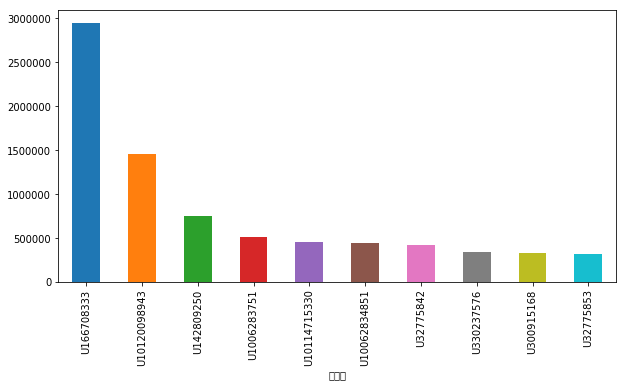

In [35]:
order_max = df.groupby('用户名')['总价'].sum().sort_values(ascending=False)
order_max.head()
%pylab inline
g = order_max[:10]
g.plot(kind='bar',figsize=[10,5])

# 导入用户浏览信息

In [15]:
import pandas as pd
view = pd.read_excel('商品浏览记录.xlsx')
view.head()

,2015-07-01 00:00:01,view,U129297265,P0023468384
0,2015-07-01 00:00:03,view,U321001337,P0018926456
1,2015-07-01 00:00:05,view,U10070718237,P0000063593
2,2015-07-01 00:00:05,view,U393805241,P0005541535
3,2015-07-01 00:00:10,view,U10004621134,P0022135540
4,2015-07-01 00:00:11,view,U370110321,P0001249080


In [16]:
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
2015-07-01 00:00:01    1048575 non-null datetime64[ns]
view                   1048575 non-null object
U129297265             1048575 non-null object
P0023468384            1048575 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 32.0+ MB


In [17]:
view.columns = ['时间','动作','用户名','产品']

In [18]:
view.head()

,时间,动作,用户名,产品
0,2015-07-01 00:00:03,view,U321001337,P0018926456
1,2015-07-01 00:00:05,view,U10070718237,P0000063593
2,2015-07-01 00:00:05,view,U393805241,P0005541535
3,2015-07-01 00:00:10,view,U10004621134,P0022135540
4,2015-07-01 00:00:11,view,U370110321,P0001249080


In [19]:
views_cnt = view.groupby(['用户名','产品'])['产品'].count().reset_index(name='views')
views_cnt.head()

,用户名,产品,views
0,None,PNone,1
1,U10000000225,P0007107111,1
2,U10000000225,P0007107122,1
3,U10000000225,P0007107413,1
4,U10000000225,P0009440001,1


## 合并购买与浏览记录

In [22]:
merge_df = pd.merge(orders_cnt,views_cnt,on=['用户名','产品'],how = 'right')
merge_df.head()

,用户名,产品,buys,views
0,U10000044910,P0018800250,1.0,2
1,U10000056953,P0013834251,1.0,7
2,U10000065461,P0023597022,1.0,1
3,U10000092625,P0023729451,1.0,4
4,U10000092625,P0024236730,1.0,4


### 了解使用者在不同时间的消费习惯

In [24]:
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
时间     1048575 non-null datetime64[ns]
动作     1048575 non-null object
用户名    1048575 non-null object
产品     1048575 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 32.0+ MB


In [26]:
view['时间'].dt.date.head()

0    2015-07-01
1    2015-07-01
2    2015-07-01
3    2015-07-01
4    2015-07-01
Name: 时间, dtype: object

In [29]:
views_cnt_by_date = view.groupby(view['时间'].dt.date)['动作'].count()
views_cnt_by_date.head()

时间
2015-07-01    24568
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: 动作, dtype: int64

### 绘制图形

Populating the interactive namespace from numpy and matplotlib


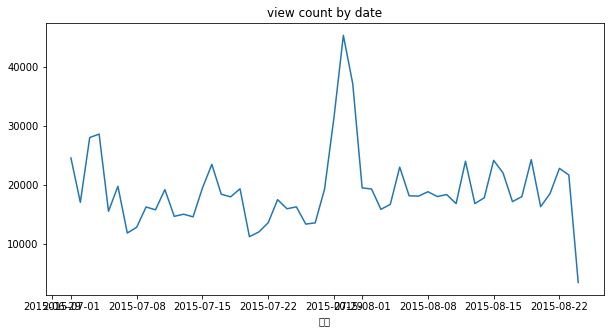

In [34]:
%pylab inline
views_cnt_by_date.plot(kind = 'line',figsize=[10,5],title='view count by date')

In [31]:
views_cnt_by_hour = view.groupby(view['时间'].dt.hour)['动作'].count()
views_cnt_by_hour.head()

时间
0    62793
1    38297
2    21691
3    14007
4     9615
Name: 动作, dtype: int64

Populating the interactive namespace from numpy and matplotlib


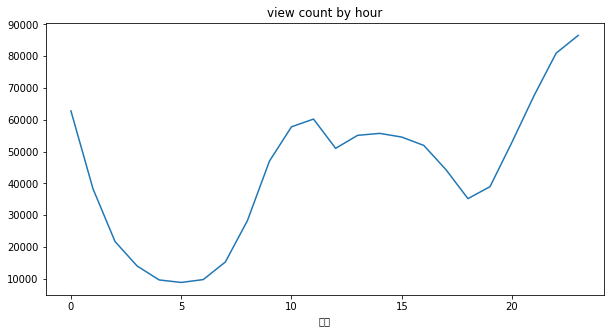

In [33]:
%pylab inline
views_cnt_by_hour.plot(kind='line',title='view count by hour',figsize=[10,5])

### 合并用户每天的购买与浏览次数

In [39]:
view_daily_cnt = view.groupby(view['时间'].dt.date)['动作'].count()
order_daily_cnt =  view.groupby(df['时间'].dt.date)['动作'].count()

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


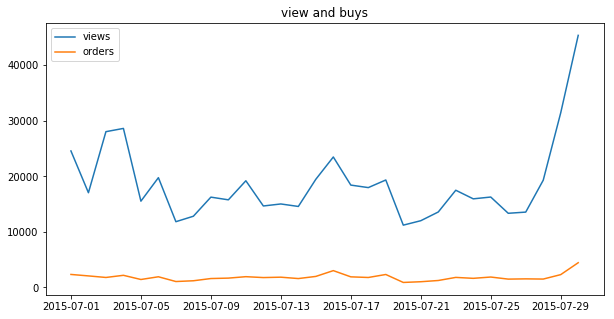

In [47]:
end = pd.concat([view_daily_cnt,order_daily_cnt],axis=1)
end.dropna(inplace=True)
end.columns = ['views','orders']

end.plot(kind = 'line',figsize=[10,5],title='view and buys')